# livelossplot example: basic API

Last update: `livelossplot 0.5.2`. For code and documentation, see [livelossplot GitHub repository](https://github.com/stared/livelossplot).

<a href="https://colab.research.google.com/github/stared/livelossplot/blob/master/examples/minimal.ipynb" target="_parent">
    <img src="https://colab.research.google.com/assets/colab-badge.svg"/>
</a>

In [1]:
!pip install livelossplot --quiet

In [2]:
%matplotlib inline

from time import sleep
from matplotlib import pyplot as plt
import numpy as np

from livelossplot import PlotLosses
from livelossplot.outputs import MatplotlibPlot

In [3]:
def test_output(outputs):
    groups = {'acccuracy': ['acc', 'val_acc'], 'log-loss': ['loss', 'val_loss']}
    plotlosses = PlotLosses(groups=groups, outputs=outputs)
    
    for i in range(100):
        plotlosses.update({
            'acc': 1 - np.random.rand() / (i + 2.),
            'val_acc': 1 - np.random.rand() / (i + 0.5),
            'loss': 1. / (i + 2.),
            'val_loss': 1. / (i + 0.5)
        })
        plotlosses.send()
        sleep(.01)

### Basic Example

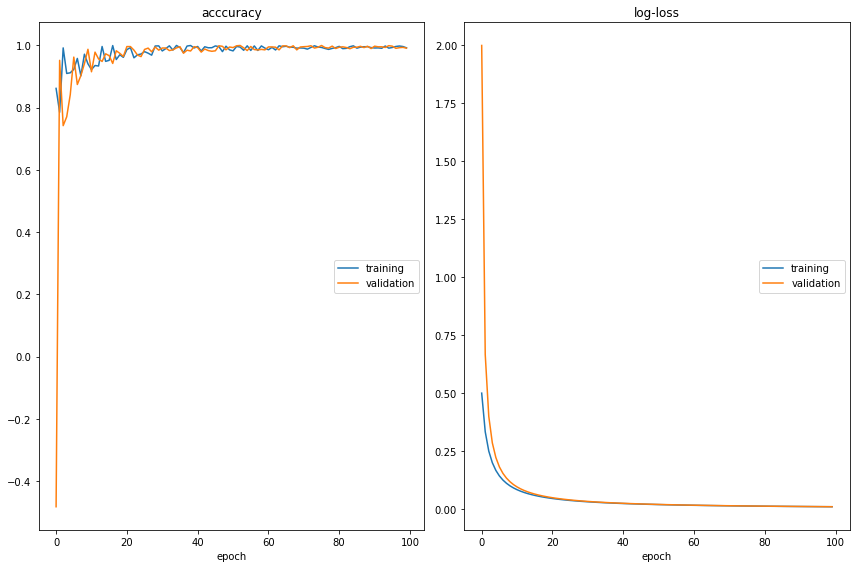

In [4]:
outputs = [MatplotlibPlot()]
test_output(outputs)

### Custom after subplot function

You can replace after subplot function, which operates on suitable group axis.

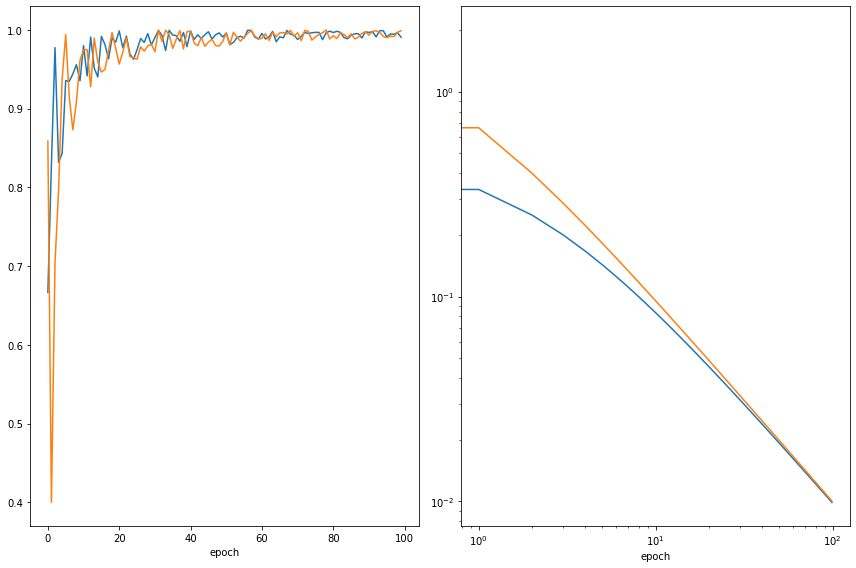

In [5]:
def custom_after_subplot(ax: plt.Axes, group: str, x_label: str):
    """Make logarithmic scale on loss chart"""
    if group == 'log-loss':
        ax.loglog()
    ax.set_xlabel(x_label)
   
outputs = [MatplotlibPlot(after_subplot=custom_after_subplot)]
test_output(outputs)

### Other functions

You can also replace `before_plot` and `after_plot` functions, that operate on suitable group axes.